In [9]:
!pip install processscheduler

Solver type:
===========

-> Standard SAT/SMT solver

Incremental optimizer:
======================

Found value: 17 elapsed time:0.018s

Checking better value < 17

Can't find a better solution for problem CarManufacturing.

Found optimum 17. Stopping iteration.

total number of iterations: 2

value: 17

CarManufacturing satisfiability checked in 0.02s

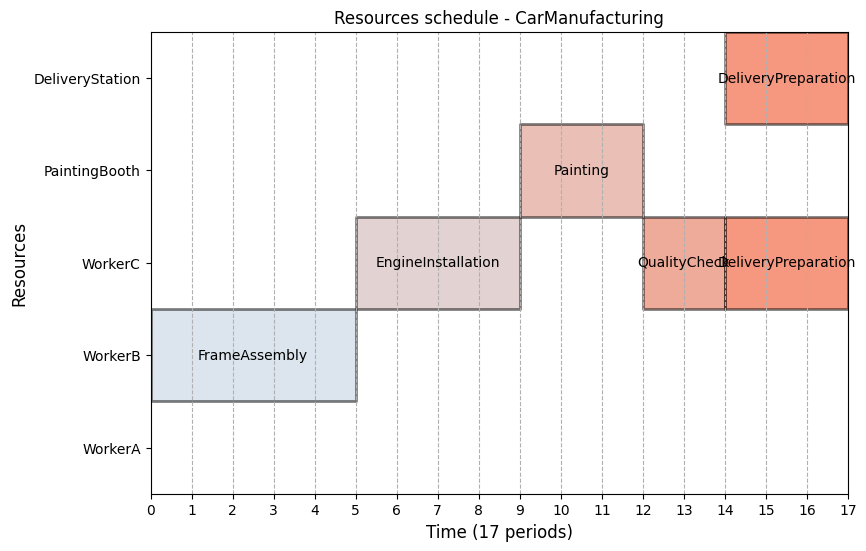

In [10]:
import processscheduler as ps
from datetime import timedelta, datetime
# Define the project
car_manufacturing = ps.SchedulingProblem(name="CarManufacturing")

# Define tasks
frame_assembly = ps.FixedDurationTask(name="FrameAssembly", duration=5)
engine_installation = ps.FixedDurationTask(name="EngineInstallation", duration=4)
painting = ps.FixedDurationTask(name="Painting", duration=3)
quality_check = ps.FixedDurationTask(name="QualityCheck", duration=2)
delivery_preparation = ps.FixedDurationTask(name="DeliveryPreparation", duration=3)

# Define resources
WorkerA = ps.Worker(name="WorkerA")
WorkerB = ps.Worker(name="WorkerB")
WorkerC = ps.Worker(name="WorkerC")
PaintingBooth = ps.Worker(name="PaintingBooth")
DeliveryStation = ps.Worker(name="DeliveryStation")

# Define precedence constraints
ps.TaskPrecedence(task_before=frame_assembly, task_after=engine_installation)
ps.TaskPrecedence(task_before=engine_installation, task_after=painting)
ps.TaskPrecedence(task_before=painting, task_after=quality_check)
ps.TaskPrecedence(task_before=quality_check, task_after=delivery_preparation)

# Assign resources to tasks
frame_assembly.add_required_resource(resource=ps.SelectWorkers(list_of_workers=[WorkerA, WorkerB], nb_workers_to_select=1))
engine_installation.add_required_resource(resource=ps.SelectWorkers(list_of_workers=[WorkerA, WorkerC], nb_workers_to_select=1))
painting.add_required_resource(resource=PaintingBooth)
quality_check.add_required_resource(resource=ps.SelectWorkers(list_of_workers=[WorkerB, WorkerC], nb_workers_to_select=1))
delivery_preparation.add_required_resource(resource=DeliveryStation)
delivery_preparation.add_required_resource(resource=ps.SelectWorkers(list_of_workers=[WorkerA, WorkerC], nb_workers_to_select=1))

# Scheduling objective
ps.ObjectiveMinimizeMakespan(name="MinimizeCarCompletionTime")

# Solve the problem and visualize
solver = ps.SchedulingSolver(problem=car_manufacturing)
solution = solver.solve()
ps.render_gantt_matplotlib(solution=solution)